<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

#Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

**Let us start by mounting the drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Let us check for the version of installed tensorflow.**

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

## 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [4]:
# Importing product_data.csv into a pandas dataframe
product_df = pd.read_csv('/content/drive/MyDrive/product_data.csv')
#Checking the shape of DF
product_df.shape

(720, 10)

**There are 720 rows and 10 columns/features in product_df**

In [5]:
#Checking top two rows of DF to get an overview of the dataset
product_df.head(2)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0000000,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0000000,0.0000000
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0000000,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.9500000,0.0000000


In [6]:
# Importing reviews.csv into a pandas dataframe
reviews_df = pd.read_csv('/content/drive/MyDrive/reviews.csv')
# Checking shape of the DF
reviews_df.shape

(67986, 8)

**There are 67986 rows and 8 columns/features in the reviews_df**

In [7]:
#Checking top two rows of DF to get an overview of data
reviews_df.head(2)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [10]:
product_df = product_df.drop(['url','image','reviewUrl'],axis=1)

In [11]:
product_df.shape

(720, 7)

**Now there are 7 columns/features in product_df**

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [13]:
product_df.describe()

,rating,totalReviews,price,originalPrice
count,720.0000000,720.0000000,720.0000000,720.0000000
mean,3.7137500,105.6791667,234.9489306,63.6907778
std,0.7160138,167.6011014,200.0084407,172.4053696
min,1.0000000,1.0000000,0.0000000,0.0000000
25%,3.3000000,7.0000000,97.5125000,0.0000000
50%,3.8000000,32.0000000,188.9750000,0.0000000
75%,4.1000000,122.2500000,336.7250000,0.0000000
max,5.0000000,983.0000000,999.9900000,999.9900000


*   There are 720 unique records in the DF
*   Average rating is 3.7 with minimum as 1 and max rating is 5
*   Price range is between 0 to 999.9 with average price around 234.94 






In [14]:
product_df.describe(include='O')

,asin,brand,title
count,720,716,720
unique,720,10,718
top,B072N3GKSM,Samsung,Google Pixel 2 XL 128GB Unlocked GSM/CDMA 4G L...
freq,1,346,2




*   Samsung is the top brand with 346 instances in the dataset
*   All the 720 records in the DF is uniquely difined by asin as some sort of IDs



In [15]:
reviews_df.describe()

,rating,helpfulVotes
count,67986.0000000,27215.0000000
mean,3.8079163,8.2296895
std,1.5829058,31.9548772
min,1.0000000,1.0000000
25%,3.0000000,1.0000000
50%,5.0000000,2.0000000
75%,5.0000000,5.0000000
max,5.0000000,990.0000000




*   rating ranges from 1 to 5 with average rating as 3.8
*   there is a instance in data with 990 helpfulvotes need to inspect this record



In [16]:
reviews_df.describe(include='object')

,asin,name,date,title,body
count,67986,67984,67986,67972,67965
unique,720,47323,2983,41489,59811
top,B00F2SKPIM,Amazon Customer,"December 11, 2019",Five Stars,Good
freq,981,6507,234,6043,303




*   Amazon Customer has the most no. of reviews 6507
*   Most reviews are 5 stars in DF with 6043 instances
*   "Good" as a comment is mentioned most i.e. 303 instances in body column of DF 




In [97]:
#Checking the records 
reviews_df[reviews_df['helpfulVotes']==990]

,asin,name,rating,date,verified,title,body,helpfulVotes
24467,B01GXAT0CE,Jake,1,"May 1, 2017",True,It seems like it has been stolen,"The product came in a beaten up box, came lock...",990.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc



*   There are 720 unique products
*   Rating ranges from 1 to 5. Mean rating is 3.71
*   There are 10 brands of which samsung comes at top.
*   Price ranges from 0 to 999.99 with 235 as mean price value
*   There are no duplicate asin id
*   To title is Apple iphone 6s








### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

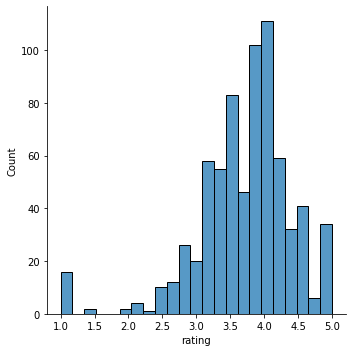

In [18]:
sns.displot(data= product_df,x='rating')

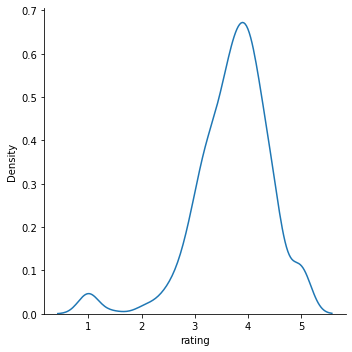

In [19]:
sns.displot(data= product_df,x='rating',kind='kde')

**ratings feature is right skewed with most of the records are between 3 and 4**

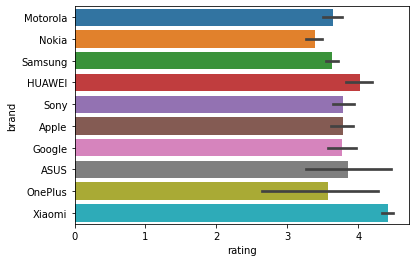

In [20]:
sns.barplot(data=product_df,x=product_df.rating,y='brand')

**Xiaomi is rated highest with average ratings above 4**

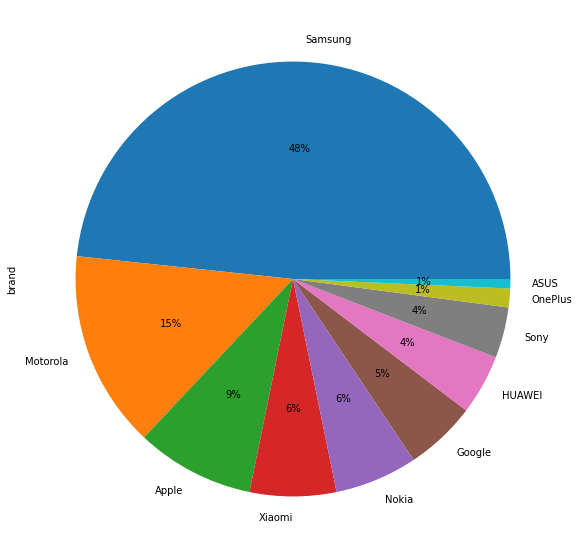

In [98]:
product_df['brand'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(12,10))

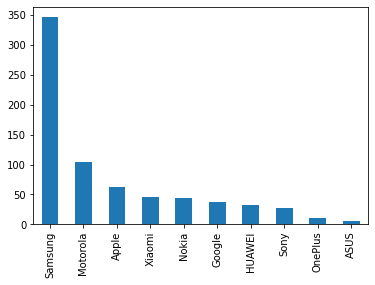

In [22]:
product_df['brand'].value_counts().plot(kind='bar')

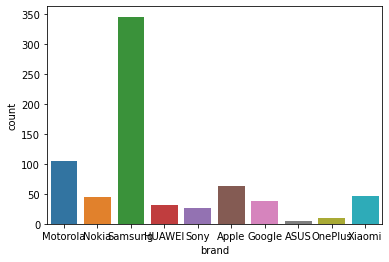

In [23]:
sns.countplot(product_df.brand)

### 4.5 Display average rating per brand

In [25]:
# Calculating average rating per brand

rating_per_brand = product_df.groupby(by='brand')['rating'].mean().sort_values(ascending=False)
rating_per_brand

brand
Xiaomi     4.4152174
HUAWEI     4.0218750
ASUS       3.8600000
Sony       3.7888889
Apple      3.7825397
Google     3.7710526
Motorola   3.6438095
Samsung    3.6326590
OnePlus    3.5800000
Nokia      3.3863636
Name: rating, dtype: float64

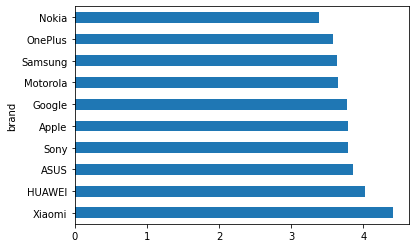

In [26]:
# Visualizing average rating per brand
rating_per_brand.plot(kind='barh')

**Xiaomi has the maximum average rating above 4**

### 4.6 Display average price per brand

In [27]:
# Calculating average price per brand

price_per_brand = product_df.groupby(by='brand')['price'].mean().sort_values(ascending=False)
price_per_brand

brand
OnePlus    426.1960000
Sony       332.7248148
ASUS       309.6860000
Apple      303.5811111
Samsung    256.5272543
Google     241.8676316
HUAWEI     218.8290625
Xiaomi     214.9676087
Motorola   139.1210476
Nokia      111.4438636
Name: price, dtype: float64

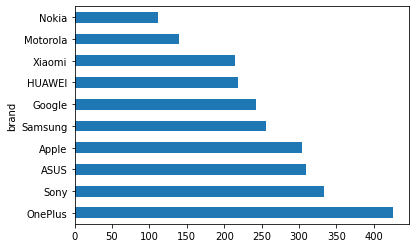

In [28]:
# Visualizing average price per brand
price_per_brand.plot(kind='barh')

**OnePlus has the highest average price above 400$**

### 4.7 Display average 'totalReviews' per brand

In [29]:
# Calculating average 'totalReviews' per brand
price_per_brand = product_df.groupby(by='brand')['totalReviews'].mean().sort_values(ascending=False)
price_per_brand

brand
Nokia      140.5000000
Sony       122.6666667
Xiaomi     121.1739130
Google     111.5263158
Samsung    108.9624277
Apple      100.2380952
Motorola    89.7047619
HUAWEI      77.0937500
ASUS        52.6000000
OnePlus     40.6000000
Name: totalReviews, dtype: float64

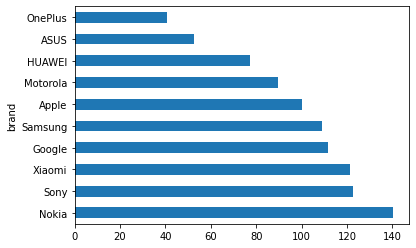

In [30]:
# Visualizing average total reviews per brand
price_per_brand.plot(kind='barh')

**Nokia has the highest average total reviews near about 140**

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [31]:
# Merging the two DFs using Pandas.merge
df = pd.merge(reviews_df, product_df,how='left',left_on='asin',right_on='asin') 
df.shape


(67986, 14)

In [32]:
df.head()

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,rating_y,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000


### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [33]:
df.rename(columns={"rating_x": "user_rating", "title_x": "review_title","title_y": "item_title","rating_y":"overall_rating"},inplace=True)

In [34]:
df.head()

,asin,name,user_rating,date,verified,review_title,body,helpfulVotes,brand,item_title,overall_rating,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0000000,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,3.0000000,14,0.0000000,0.0000000


### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [35]:
df = df[df.verified==True]

In [36]:
df.shape

(61225, 14)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

In [37]:
# Calculating  the number of reviews for various brands 
reviews_brand = df.groupby(by='brand')['totalReviews'].count().sort_values(ascending=False)
reviews_brand

brand
Samsung     31020
Motorola     7714
Nokia        4878
Apple        4876
Xiaomi       4207
Google       3163
Sony         2691
HUAWEI       2019
OnePlus       304
ASUS          206
Name: totalReviews, dtype: int64

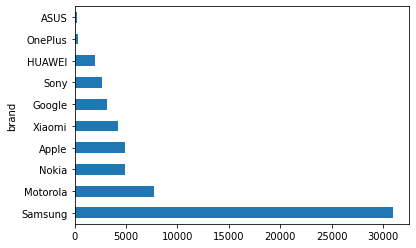

In [38]:
reviews_brand.plot(kind='barh')

**Samsumg is the most reviewed brand.It has reviews above 30000**

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [39]:
df.head(2)

,asin,name,user_rating,date,verified,review_title,body,helpfulVotes,brand,item_title,overall_rating,totalReviews,price,originalPrice
14,B0009N5L7K,Marcel Thomas,1,"March 5, 2016",True,Stupid phone,DON'T BUY OUT OF SERVICE,nan,Motorola,Motorola I265 phone,3.0000000,7,49.9500000,0.0000000
17,B0009N5L7K,Stephen Cahill,1,"December 20, 2016",True,Phones locked,1 star because the phones locked so I have to ...,nan,Motorola,Motorola I265 phone,3.0000000,7,49.9500000,0.0000000


In [40]:
df.columns

Index(['asin', 'name', 'user_rating', 'date', 'verified', 'review_title',
       'body', 'helpfulVotes', 'brand', 'item_title', 'overall_rating',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [41]:
# Dropping unnecessary columns
df_final = df.drop(['asin', 'totalReviews','originalPrice', 'name', 'overall_rating', 'date', 'verified','item_title',  'helpfulVotes'],axis=1)

In [42]:
df_final.head(2)

,user_rating,review_title,body,brand,price
14,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,49.9500000
17,1,Phones locked,1 star because the phones locked so I have to ...,Motorola,49.9500000


In [43]:
# Final shape of DF
df_final.shape

(61225, 5)

### 4.13 Perform univariate analysis. Check distribution of price, user_rating

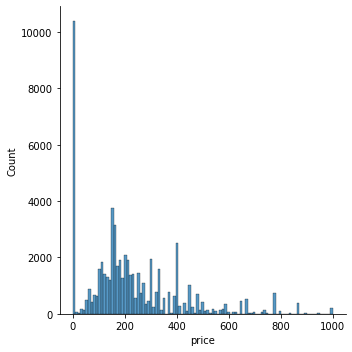

In [44]:
sns.displot(data=df_final,x='price')

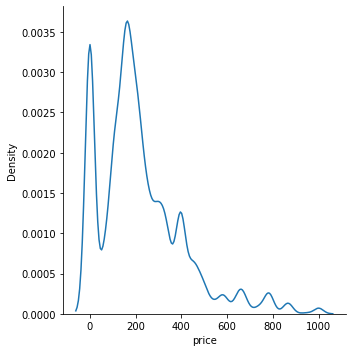

In [45]:
sns.displot(data=df_final,x='price',kind='kde')

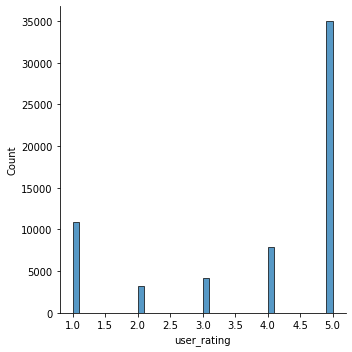

In [46]:
sns.displot(data=df_final,x='user_rating')

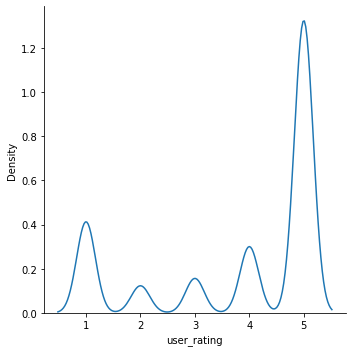

In [47]:
sns.displot(data=df_final,x='user_rating',kind='kde')

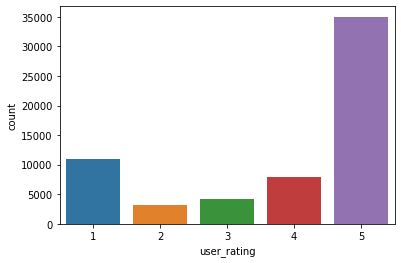

In [48]:
sns.countplot(df_final['user_rating'])

In [49]:
df_final['user_rating'].value_counts()

5    35001
1    10910
4     7938
3     4128
2     3248
Name: user_rating, dtype: int64

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (negative) if the user_Rating <= 3

In [50]:
df_final['sentiment'] = df_final['user_rating'].apply(lambda x : 1 if x > 3 else 0)

In [51]:
df_final.head()

,user_rating,review_title,body,brand,price,sentiment
14,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,49.9500000,0
17,1,Phones locked,1 star because the phones locked so I have to ...,Motorola,49.9500000,0
18,5,Excellent product,The product has been very good. I had used thi...,Motorola,49.9500000,1
21,4,"Nice, but",I bought this phone to replace an LG phone tha...,Motorola,99.9900000,1
22,1,It seems it doesn't work with the existing AT&...,I purchased this phone for my AT&T phone repla...,Motorola,99.9900000,0


### 4.15 Check frequency distribution of the 'sentiment'

In [52]:
df_final['sentiment'].value_counts()

1    42939
0    18286
Name: sentiment, dtype: int64

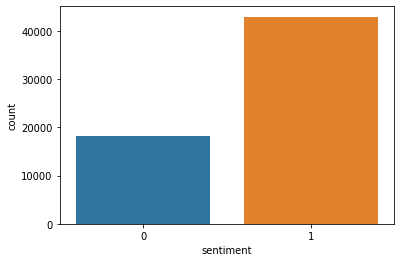

In [53]:
sns.countplot(df_final['sentiment'])

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [54]:
df_final.corr()

,user_rating,price,sentiment
user_rating,1.0000000,0.0549462,0.9341710
price,0.0549462,1.0000000,0.0511434
sentiment,0.9341710,0.0511434,1.0000000




*   user_rating and sentiments are positively correlated.
*   price doesnt seem to have larger influence on either sentiments of user or their ratings




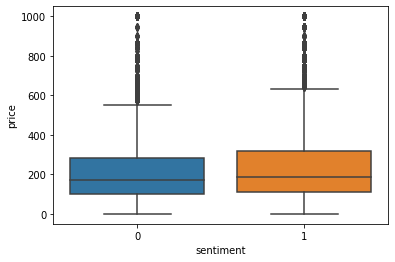

In [55]:
sns.boxplot(x=df_final['sentiment'],y=df_final['price'])

In [56]:
pd.crosstab(df_final['brand'],df_final['sentiment'])

sentiment,0,1
brand,,
ASUS,69,137
Apple,1627,3249
Google,1011,2152
HUAWEI,366,1653
Motorola,2220,5494
Nokia,1904,2974
OnePlus,45,259
Samsung,9499,21521
Sony,879,1812


In [57]:
pd.crosstab(df_final['brand'],df_final['sentiment']).apply(lambda x : x/x.sum(),axis=1)

sentiment,0,1
brand,,
ASUS,0.3349515,0.6650485
Apple,0.3336751,0.6663249
Google,0.3196333,0.6803667
HUAWEI,0.1812779,0.8187221
Motorola,0.2877884,0.7122116
Nokia,0.3903239,0.6096761
OnePlus,0.1480263,0.8519737
Samsung,0.3062218,0.6937782
Sony,0.3266444,0.6733556


## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will peform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [58]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61225 entries, 14 to 67984
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_rating   61225 non-null  int64  
 1   review_title  61211 non-null  object 
 2   body          61207 non-null  object 
 3   brand         61078 non-null  object 
 4   price         61225 non-null  float64
 5   sentiment     61225 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 5.8+ MB


In [59]:
df_final['body'] = df_final['body'].astype('string')

In [60]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61225 entries, 14 to 67984
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_rating   61225 non-null  int64  
 1   review_title  61211 non-null  object 
 2   body          61207 non-null  string 
 3   brand         61078 non-null  object 
 4   price         61225 non-null  float64
 5   sentiment     61225 non-null  int64  
dtypes: float64(1), int64(2), object(2), string(1)
memory usage: 5.8+ MB


In [61]:
df_final.head(2)

,user_rating,review_title,body,brand,price,sentiment
14,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,49.9500000,0
17,1,Phones locked,1 star because the phones locked so I have to ...,Motorola,49.9500000,0


In [62]:
df_final['keywords'] = df_final['body'].str.lower()

In [63]:
df_final['keywords'].head(2)

14                             don't buy out of service
17    1 star because the phones locked so i have to ...
Name: keywords, dtype: string

In [64]:
df_final.head()

,user_rating,review_title,body,brand,price,sentiment,keywords
14,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,49.9500000,0,don't buy out of service
17,1,Phones locked,1 star because the phones locked so I have to ...,Motorola,49.9500000,0,1 star because the phones locked so i have to ...
18,5,Excellent product,The product has been very good. I had used thi...,Motorola,49.9500000,1,the product has been very good. i had used thi...
21,4,"Nice, but",I bought this phone to replace an LG phone tha...,Motorola,99.9900000,1,i bought this phone to replace an lg phone tha...
22,1,It seems it doesn't work with the existing AT&...,I purchased this phone for my AT&T phone repla...,Motorola,99.9900000,0,i purchased this phone for my at&t phone repla...


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [65]:
import string
df_final['keywords'] = df_final['keywords'].str.translate(str.maketrans('', '', string.punctuation))

In [66]:
df_final.head(2)

,user_rating,review_title,body,brand,price,sentiment,keywords
14,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,49.9500000,0,dont buy out of service
17,1,Phones locked,1 star because the phones locked so I have to ...,Motorola,49.9500000,0,1 star because the phones locked so i have to ...


In [67]:
#Using regEx

df_final['keywords'] = df_final['keywords'].str.replace('[^\w\s]','')

In [68]:
df_final.head(2)

,user_rating,review_title,body,brand,price,sentiment,keywords
14,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,49.9500000,0,dont buy out of service
17,1,Phones locked,1 star because the phones locked so I have to ...,Motorola,49.9500000,0,1 star because the phones locked so i have to ...


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [69]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [70]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [71]:
df_final['keywords'] = df_final['keywords'].astype('str')
df_final['keywords'] = df_final['keywords'].apply(lambda words: ' '.join(w for w in words.split() if w not in stop_words))
df_final.head()


,user_rating,review_title,body,brand,price,sentiment,keywords
14,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,49.9500000,0,dont buy service
17,1,Phones locked,1 star because the phones locked so I have to ...,Motorola,49.9500000,0,1 star phones locked pay additional fees unlock
18,5,Excellent product,The product has been very good. I had used thi...,Motorola,49.9500000,1,product good used cell phone one projects work...
21,4,"Nice, but",I bought this phone to replace an LG phone tha...,Motorola,99.9900000,1,bought phone replace lg phone didnt like expec...
22,1,It seems it doesn't work with the existing AT&...,I purchased this phone for my AT&T phone repla...,Motorola,99.9900000,0,purchased phone att phone replacement even tho...


### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [72]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [73]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [74]:
def lemmetize_text(text):
  return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [75]:
df_final['lemm'] = df_final['keywords'].apply(lemmetize_text)

In [76]:
df_final.head()

,user_rating,review_title,body,brand,price,sentiment,keywords,lemm
14,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,49.9500000,0,dont buy service,"[dont, buy, service]"
17,1,Phones locked,1 star because the phones locked so I have to ...,Motorola,49.9500000,0,1 star phones locked pay additional fees unlock,"[1, star, phone, locked, pay, additional, fee,..."
18,5,Excellent product,The product has been very good. I had used thi...,Motorola,49.9500000,1,product good used cell phone one projects work...,"[product, good, used, cell, phone, one, projec..."
21,4,"Nice, but",I bought this phone to replace an LG phone tha...,Motorola,99.9900000,1,bought phone replace lg phone didnt like expec...,"[bought, phone, replace, lg, phone, didnt, lik..."
22,1,It seems it doesn't work with the existing AT&...,I purchased this phone for my AT&T phone repla...,Motorola,99.9900000,0,purchased phone att phone replacement even tho...,"[purchased, phone, att, phone, replacement, ev..."


In [77]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
  
print("replacement :", lemmatizer.lemmatize("replacement"))
print("corpora :", lemmatizer.lemmatize("corpora"))
  
# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))


replacement : replacement
corpora : corpus
better : good


### 5.5 Check most common and rare words in the processed text
- We can also write a function to check word frequency of the text (Optional)

In [78]:
from collections import Counter
cnt = Counter()
for text in df_final["keywords"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)


[('phone', 74458),
 ('great', 16986),
 ('good', 13415),
 ('battery', 11641),
 ('screen', 10377),
 ('like', 10360),
 ('one', 10035),
 ('new', 9498),
 ('use', 8755),
 ('get', 7566)]

In [79]:
rare_words = 10

cnt.most_common()[:-rare_words-1:-1]

[('prontoen', 1),
 ('500500', 1),
 ('sd730g', 1),
 ('nois', 1),
 ('tomuch', 1),
 ('instructivo', 1),
 ('confirmen', 1),
 ('intrligente', 1),
 ('haxe', 1),
 ('4ever', 1)]

In [80]:
#positive sentiments
df_pos = df_final[df_final["sentiment"]==1]


from collections import Counter
cnt = Counter()
for text in df_pos["keywords"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)


[('phone', 46541),
 ('great', 14951),
 ('good', 10682),
 ('battery', 7588),
 ('like', 7442),
 ('love', 6709),
 ('new', 6594),
 ('one', 6421),
 ('works', 6266),
 ('screen', 6149)]

### 5.6 Initialize tf-idf vectorizer and transform the preprocessed body text

In [81]:

# Initialize TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [82]:
# Initialize TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(2,2))

In [83]:
df_final['tfidf'] = tfidf_vectorizer.fit_transform(df_final["keywords"])

In [84]:
df_final['tfidf1'] = tfidf_vectorizer.fit_transform(df_final["keywords"])

In [85]:
df_final.head()

,user_rating,review_title,body,brand,price,sentiment,keywords,lemm,tfidf,tfidf1
14,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola,49.9500000,0,dont buy service,"[dont, buy, service]","(0, 30399)\t0.6476923685921244\n (0, 6822)\...","(0, 30399)\t0.6476923685921244\n (0, 6822)\..."
17,1,Phones locked,1 star because the phones locked so I have to ...,Motorola,49.9500000,0,1 star phones locked pay additional fees unlock,"[1, star, phone, locked, pay, additional, fee,...","(0, 30399)\t0.6476923685921244\n (0, 6822)\...","(0, 30399)\t0.6476923685921244\n (0, 6822)\..."
18,5,Excellent product,The product has been very good. I had used thi...,Motorola,49.9500000,1,product good used cell phone one projects work...,"[product, good, used, cell, phone, one, projec...","(0, 30399)\t0.6476923685921244\n (0, 6822)\...","(0, 30399)\t0.6476923685921244\n (0, 6822)\..."
21,4,"Nice, but",I bought this phone to replace an LG phone tha...,Motorola,99.9900000,1,bought phone replace lg phone didnt like expec...,"[bought, phone, replace, lg, phone, didnt, lik...","(0, 30399)\t0.6476923685921244\n (0, 6822)\...","(0, 30399)\t0.6476923685921244\n (0, 6822)\..."
22,1,It seems it doesn't work with the existing AT&...,I purchased this phone for my AT&T phone repla...,Motorola,99.9900000,0,purchased phone att phone replacement even tho...,"[purchased, phone, att, phone, replacement, ev...","(0, 30399)\t0.6476923685921244\n (0, 6822)\...","(0, 30399)\t0.6476923685921244\n (0, 6822)\..."


In [86]:
tfidf = tfidf_vectorizer.fit_transform(df_final["keywords"])

In [87]:
tfidf1 = tfidf_vectorizer1.fit_transform(df_final['keywords'])

In [88]:
tfidf.get_shape()

(61225, 38349)

In [89]:
tfidf1.get_shape()

(61225, 569104)

### 5.7 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [90]:
y = df_final['sentiment']

### 5.9 Split the data into Train & Test Sets

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(tfidf, y, random_state = 50, stratify=y, test_size=0.3)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1 = RandomForestClassifier()
rf_clf1.fit(X_train, y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
print("Train accuracy of the model is : ",rf_clf1.score(X_train, y1_train))
print("Test accuracy of the model is : ",rf_clf1.score(X_test, y1_test))

Train accuracy of the model is :  0.9958466528221761
Test accuracy of the model is :  0.8875762195121951


In [94]:
from sklearn.metrics import confusion_matrix
y1_pred = rf_clf1.predict(X_train)
confusion_matrix(y1_train, y1_pred)


array([[12638,   162],
       [   16, 30041]])

In [95]:
from sklearn.metrics import confusion_matrix
y1_pred = rf_clf1.predict(X_test)
confusion_matrix(y1_test, y1_pred)


array([[ 4041,  1445],
       [  620, 12262]])

In [96]:
X_train, X_test, y1_train, y1_test = train_test_split(tfidf1, y, random_state = 50, stratify=y, test_size=0.3)
from sklearn.ensemble import RandomForestClassifier
rf_clf1 = RandomForestClassifier()
rf_clf1.fit(X_train, y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print("Train accuracy of the model is : ",rf_clf1.score(X_train, y1_train))
print("Test accuracy of the model is : ",rf_clf1.score(X_test, y1_test))


In [ ]:
from sklearn.metrics import confusion_matrix
y1_pred = rf_clf1.predict(X_train)
confusion_matrix(y1_train, y1_pred)


In [ ]:
from sklearn.metrics import confusion_matrix
y1_pred = rf_clf1.predict(X_test)
confusion_matrix(y1_test, y1_pred)


## 7. Write your conclusion



*   We can see model is overfit , so we can tune some hyperparameters to improve the accuracy. 
*   We can also tune some hyperparameters to reduce the shape of our tfidf,etc
*   We can try max feature 
*   We are only usinf body attribute for analysis in this notebook we can add review_title and also brand along with body to get some deeper insights.  



